In [1]:
import pypangraph as pp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import defaultdict

In [2]:
graph = pp.Pangraph.from_json("data/Ot_IR_pangraph.json")

In [3]:
print(graph)


pangraph object with 17 paths, 1346 blocks and 8916 nodes


##### Nodes are different alleles of multiple sequence alignments (blocks). Each genomes is represented by a specific path to connect the blocks in a pangraph.

In [4]:
print(graph.paths.keys())

['Boryong', 'Gilliam', 'Ikeda', 'Karp', 'Kato', 'TA686', 'TA763', 'TW1', 'TW22', 'UT176', 'UT76', 'wgot003', 'wgot004', 'wgot005', 'wgot013', 'wgot019', 'wuj2014']


In [5]:
# TA686 as an example
path = graph.paths["TA686"]
print(path)

path object | name = TA686, n. nodes = 432, length = 614960 bp


In [4]:
stats_df = graph.to_blockstats_df()
print(stats_df)
print(sum(stats_df.len))

                      count  n_strains  duplicated   core   len
block_id                                                       
17012036906189871         7          7       False  False   186
37985401216442014        11         11       False  False   195
38008848446084887         1          1       False  False   538
51901670817283604         1          1       False  False   162
57309322976003174         3          2        True  False   104
...                     ...        ...         ...    ...   ...
18368302979122214377     17         17       False   True  6367
18372917796639777402      2          2       False  False   308
18424108847408228370      2          2       False  False   102
18425091534943784597      1          1       False  False  1002
18444501337796119980      5          5       False  False   154

[1346 rows x 5 columns]
899850


In [15]:
core_df = stats_df[stats_df['core']==True]
print(core_df)
print(sum(core_df.len))
print(sum(core_df["count"]))

                      count  n_strains  duplicated  core    len
block_id                                                       
309096818263590214       17         17       False  True   1368
341832573427616721       17         17       False  True  10904
669503142549358851       17         17       False  True   1635
764482624469864260       17         17       False  True   6890
1368855269209530838      17         17       False  True   3473
...                     ...        ...         ...   ...    ...
17987592127270774783     17         17       False  True   6899
18094336628651219778     17         17       False  True   3905
18242450664816078098     17         17       False  True   2221
18316899597343048140     17         17       False  True   4429
18368302979122214377     17         17       False  True   6367

[106 rows x 5 columns]
474301
1802


##### there are 106 types, 1802 number of core blocks

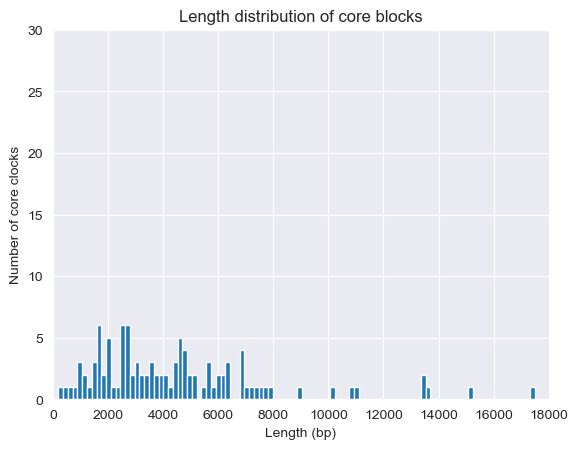

In [10]:
plt.hist(core_df.len,bins=100)
plt.title("Length distribution of core blocks")
plt.xlabel("Length (bp)")
plt.ylabel("Number of core clocks")
plt.xlim((0,18000))
plt.ylim((0,30))
plt.savefig("output/core_block_length_distribution_IR.pdf")
plt.show()

## Pangrnome frequency visualisation

In [17]:
nstrain = stats_df.n_strains.to_list()
counts = []
for n in range(1,18):
    counts.append(nstrain.count(n))

print(counts)
print(sum(counts))

[435, 204, 87, 76, 44, 28, 40, 26, 39, 15, 27, 28, 39, 41, 48, 54, 115]
1346


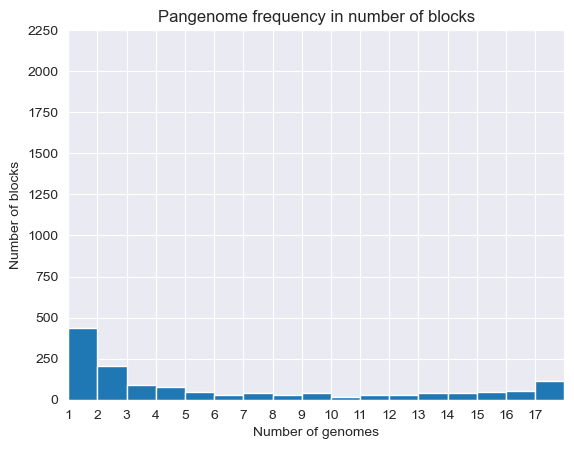

In [12]:
plt.hist(stats_df.n_strains,bins=np.arange(1,19))
plt.title("Pangenome frequency in number of blocks")
plt.xlabel("Number of genomes")
plt.ylabel("Number of blocks")
plt.xlim(1,18)
plt.ylim((0,2250))
plt.xticks(np.arange(1, 18))
plt.savefig("output/block_number_distribution_IR.pdf")
plt.show()

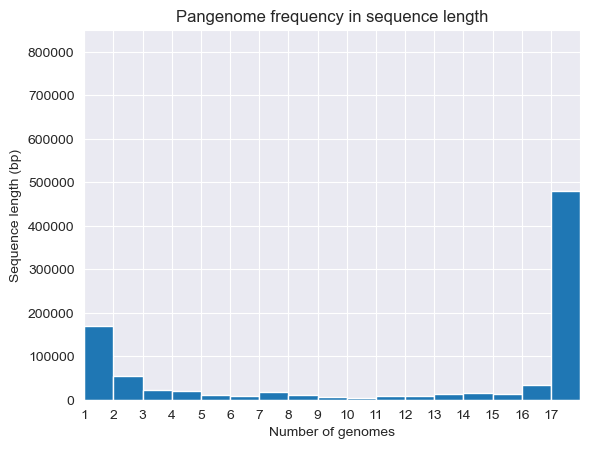

In [13]:
plt.hist(stats_df.n_strains,bins=np.arange(1,19),weights=stats_df.len)
plt.title("Pangenome frequency in sequence length")
plt.xlabel("Number of genomes")
plt.ylabel("Sequence length (bp)")
plt.xlim(1,18)
plt.ylim((0,850000))
plt.xticks(np.arange(1, 18))
plt.savefig("output/block_length_distribution_IR.pdf")
plt.show()

## Block presence-absence

In [13]:
bl_count = graph.to_blockcount_df()
print(bl_count)

path_id               Boryong  Gilliam  Ikeda  Karp  Kato  TA686  TA763  TW1  \
block_id                                                                       
17012036906189871           0        0      1     1     0      0      0    0   
37985401216442014           1        1      0     0     0      0      0    1   
38008848446084887           0        0      0     0     0      1      0    0   
51901670817283604           0        0      0     0     0      1      0    0   
57309322976003174           0        0      0     0     0      1      0    0   
...                       ...      ...    ...   ...   ...    ...    ...  ...   
18368302979122214377        1        1      1     1     1      1      1    1   
18372917796639777402        0        0      0     0     0      0      0    1   
18424108847408228370        0        0      1     0     0      0      0    0   
18425091534943784597        0        0      0     0     0      1      0    0   
18444501337796119980        0        0  

<Axes: xlabel='block_id', ylabel='path_id'>

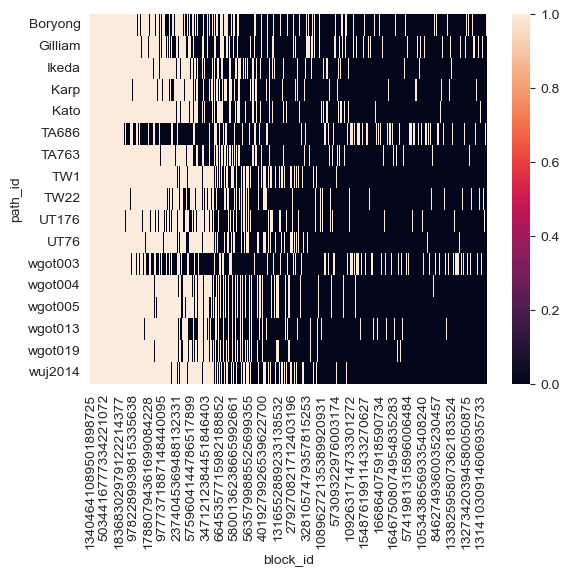

In [14]:
# block presence-absence matrix
block_PA = bl_count > 0
# order blocks by frequency
bl_order = block_PA.sum(axis=1).sort_values(ascending=False).index
# plot presence-absence matrix
sns.heatmap(block_PA.loc[bl_order].T)

## Visualising paths

In [15]:
path_dict = graph.to_path_dictionary()
#print(path_dict)

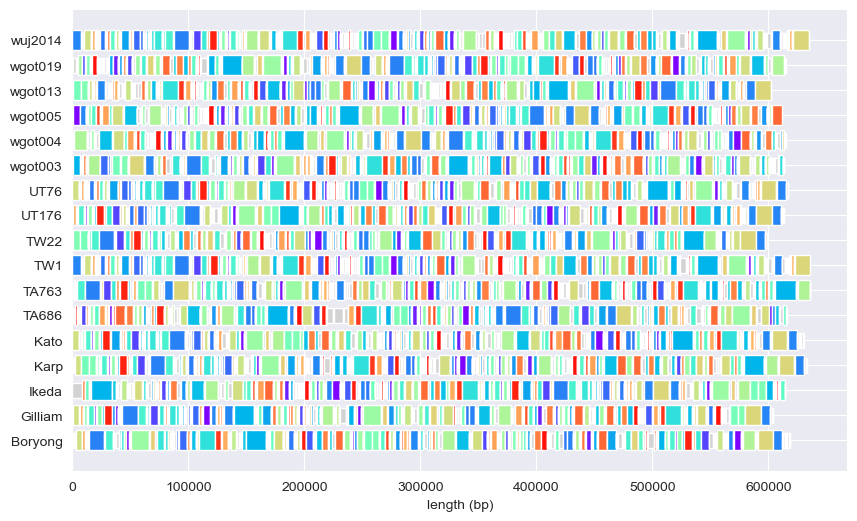

In [16]:
block_stats = graph.to_blockstats_df()
# dictionary to assign a new random color to each block
block_color = defaultdict(lambda: plt.cm.rainbow(np.random.rand()))

fig, ax = plt.subplots(figsize=(10, 6))

y = 0
for path_name, path in path_dict.items():
    x = 0
    for block_id, block_strand in path:

        L = block_stats.loc[block_id, "len"] # block consensus length
        is_core = block_stats.loc[block_id, "core"]

        # block color
        color = block_color[block_id] if is_core else "lightgray"
        block_color[block_id] = mpl.colors.to_hex(color)

        height = 0.8 if is_core else 0.6 # block thickness

        ax.barh(y, L, left=x, height=height, color=color)

        x += L
    y += 1

ax.set_yticks(range(len(path_dict)))
ax.set_yticklabels(path_dict.keys())
ax.set_xlabel("length (bp)")
plt.savefig("output/synteny_IR.pdf",format="pdf")
plt.show()


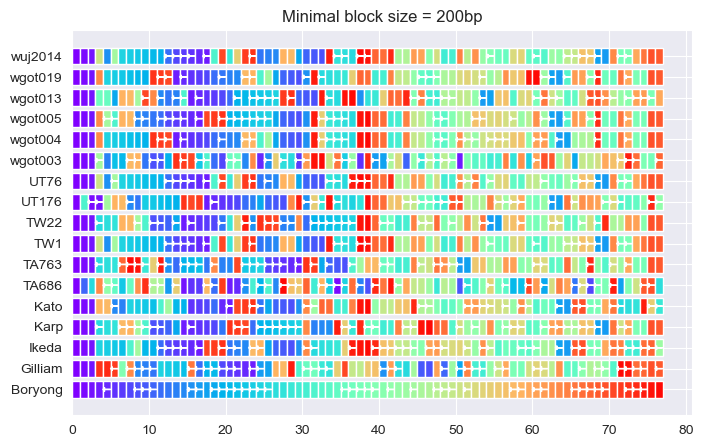

In [17]:
# find MSUs
threshold_len = 200  # minimal length of core blocks to consider
MSU_mergers, MSU_paths, MSU_len = pp.minimal_synteny_units(graph, threshold_len)

# dictionary to assign colors to MSUs
cmap = mpl.colormaps["rainbow"]
color_generator = (cmap(i / len(MSU_len)) for i in range(len(MSU_len)))
colors = defaultdict(lambda: next(color_generator))

fig, ax = plt.subplots(figsize=(8, 5))

for i, (iso, path) in enumerate(MSU_paths.items()):
    for j, node in enumerate(path.nodes):
        ax.barh(i, 1, left=j, color=colors[node.id])
        if not node.strand:
            ax.arrow(j + 1, i, -0.8, 0, head_width=0.2, head_length=0.2)
ax.set_yticks(range(len(MSU_paths)))
ax.set_yticklabels(list(MSU_paths.keys()))
plt.title("Minimal block size = 200bp")
plt.savefig("output/MSU_IR_core100_min200.pdf",format="pdf")
plt.show()

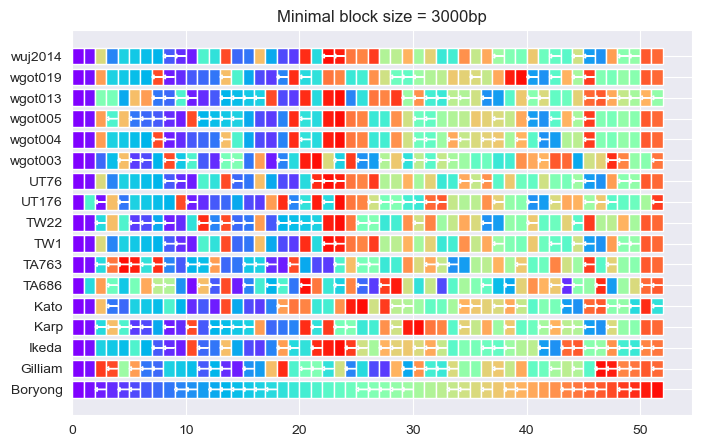

In [18]:
threshold_len = 3000  # minimal length of core blocks to consider
MSU_mergers, MSU_paths, MSU_len = pp.minimal_synteny_units(graph, threshold_len)
# dictionary to assign colors to MSUs
cmap = mpl.colormaps["rainbow"]
color_generator = (cmap(i / len(MSU_len)) for i in range(len(MSU_len)))
colors = defaultdict(lambda: next(color_generator))

fig, ax = plt.subplots(figsize=(8, 5))

for i, (iso, path) in enumerate(MSU_paths.items()):
    for j, node in enumerate(path.nodes):
        ax.barh(i, 1, left=j, color=colors[node.id])
        if not node.strand:
            ax.arrow(j + 1, i, -0.8, 0, head_width=0.2, head_length=0.2)
ax.set_yticks(range(len(MSU_paths)))
ax.set_yticklabels(list(MSU_paths.keys()))
plt.title("Minimal block size = 3000bp")
plt.savefig("output/MSU_IR_core100_min3000.pdf",format="pdf")
plt.show()